In [2]:
!pip install pygeoif


In [3]:
!pip install osmium 

In [4]:
!pip install pyrosm 

In [5]:
import os
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.0
  import geopandas as gpd
if gpd.__version__ != "0.10.0":
  !pip install -U geopandas==0.10.0  
  import geopandas as gpd

/home/ioannisio/geopoutses/trelos/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [6]:
try:
  import pygeos
except ModuleNotFoundError as e:
  !pip install pygeos==0.10.2
  import pygeos

In [7]:
try:
  import geopy
except ModuleNotFoundError as e:
  !pip install geopy
  import geopy

In [8]:
import pandas as pd
import osmium
import requests
from shapely.geometry import MultiPolygon
from shapely.geometry import shape
from geopy.geocoders import Nominatim

In [9]:
import pyrosm
from pyrosm.data import sources
import matplotlib.pyplot as plt
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
from shapely.ops import unary_union

In [10]:
try:
    import osmnx as ox
except ModuleNotFoundError as e:
    !pip install osmnx

We start by extract the municipalities shape boudaries of Athens and plot them

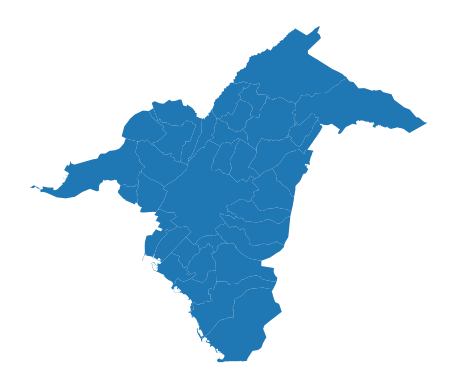

In [12]:
city = ox.geocode_to_gdf(['Atenes, Greece','Vyronas,Greece','Municipality of Galatsi',
                          'Municipality of Dafni-Ymittos','Municipality of Zografos',
                          'Municipality of Ilioupoli','Kessariani, Greece','Municipality of Nea Philadelfia - Nea Chalkidona',
                          'Municipality of Marousi','Municipality of Agia Paraskevi',
                          'Municipality of Vrilissia',
                          'Municipality of Iraklio Attikis','Municipality of Kifisia',
                          'Municipality of Likovrisi-Pefki','Municipality of Metamorfosi',
                          'Municipality of Nea Ionia','Municipality of Papagos-Cholargos',
                          'Municipality of Penteli','Municipality of Filothei-Psychiko',
                          'Municipality of Chalandri','Municipality of Peristeri',
                          'Municipality of Agia Varvara','Municipality of Agioi Anargyroi-Kamatero',
                          'Municipality of Aigaleo','Municipality of Ilion',
                          'Municipality of Petroupoli','Municipality of Chaidari',
                          'Municipality of Kallithea','Municipality of Agios Dimitrios',
                          'Municipality of Alimos','Municipality of Glyfada',
                          'Municipality of Elliniko-Argyroupoli','Municipality of Moschato-Tavros',
                          'Municipality of Nea Smyrni','Municipality of Palaio Faliro'
                          
                         ])
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [13]:
city

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((23.68700 37.97844, 23.68749 37.97825...",38.032760,37.948843,23.790439,23.687005,351968359,relation,1370736,37.990858,23.741474,"Municipality of Athens, Regional Unit of Centr...",boundary,administrative,0.452955
1,"POLYGON ((23.74457 37.96093, 23.74542 37.95998...",37.965861,37.934444,23.814920,23.744566,307986832,relation,1400416,37.950291,23.767177,"Municipality of Vyronas, Regional Unit of Cent...",boundary,administrative,0.476097
2,"POLYGON ((23.74322 38.00819, 23.74463 38.00809...",38.034099,38.004424,23.772715,23.743216,307965562,relation,1401607,38.019440,23.755539,"Municipality of Galatsi, Regional Unit of Cent...",boundary,administrative,0.567719
3,"POLYGON ((23.72454 37.94996, 23.72458 37.94991...",37.957421,37.941930,23.757051,23.724543,308155571,relation,2682709,37.949688,23.745988,"Municipality of Dafni - Ymittos, Regional Unit...",boundary,administrative,0.790554
4,"POLYGON ((23.75668 37.97929, 23.75682 37.97911...",37.984690,37.964161,23.823200,23.756680,307950314,relation,1392944,37.974335,23.791348,"Municipality of Zografos, Regional Unit of Cen...",boundary,administrative,0.567719
5,"POLYGON ((23.74042 37.94129, 23.74079 37.93990...",37.950047,37.915813,23.806810,23.740423,307955243,relation,1400220,37.931631,23.767676,"Municipality of Ilioupoli, Regional Unit of Ce...",boundary,administrative,0.771322
6,"POLYGON ((23.75001 37.97220, 23.75007 37.97213...",37.973567,37.946070,23.822063,23.750013,351968360,relation,1400434,37.959821,23.797620,"Municipality of Kaisariani, Regional Unit of C...",boundary,administrative,0.376913
7,"POLYGON ((23.71936 38.01786, 23.71949 38.01786...",38.059134,38.016408,23.750086,23.719364,307991387,relation,2190342,38.037739,23.738451,Municipality of Nea Philadelfia - Nea Chalkido...,boundary,administrative,0.997167
8,"POLYGON ((23.77593 38.04106, 23.77639 38.04068...",38.067175,38.023849,23.831454,23.775927,307989161,relation,1385823,38.045588,23.805247,"Municipality of Marousi, Regional Unit of Nort...",boundary,administrative,0.367710
9,"POLYGON ((23.80530 38.00887, 23.80538 38.00875...",38.023492,37.985288,23.847768,23.805296,307990594,relation,1400708,38.004233,23.823842,"Municipality of Agia Paraskevi, Regional Unit ...",boundary,administrative,0.668514


We save the geodataframe as a .geojson file 

In [15]:
city.to_crs(epsg=4326).to_file('Athens_City.geojson',driver='GeoJSON')

Finding the external boundary of Athens to use it to extract OSM features

In [17]:
boundary = city.geometry.unary_union # unite the shapes 

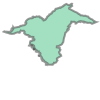

In [18]:
boundary

<Axes: >

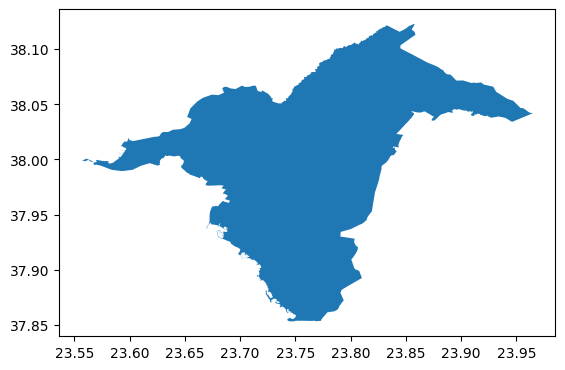

In [19]:
Athens_union = gpd.GeoDataFrame(geometry = [boundary])
Athens_union.plot()

we are going to extract the limit longtitude and lattitude of the boundary box of Athens that are going to be useful for the data preperation

In [21]:
Athensbox= Athens_union.bounds # give the limit points that define the boundary box 

In [22]:
Athensbox

,minx,miny,maxx,maxy
0,23.556867,37.853319,23.96498,38.122542


In [30]:
Athensbox.to_csv('Athensbox.csv', index=False)

The osm data for the country of Greece is only given by the geofabrik.de

In [27]:
Greece_pbf_url = "https://download.geofabrik.de/europe/greece-latest.osm.pbf"
r = requests.get(Greece_pbf_url, allow_redirects=True)
#save the file
open('Greece.pbf', 'wb').write(r.content)

Because we dont need all the data of greece but only the region of Athens, we create a new .pbf file with the 'osmosis' ,using the boundary box of Athens that we just create

In [29]:
!osmium extract -b 23.556867,37.853319,23.96498,38.122542 Greece.pbf -o Athens_polis.osm

In [30]:
!osmosis --read-pbf file="/home/ioannisio/Project Geospatial/Greece.pbf" --bounding-box top=38.122542 left=23.556867 bottom=37.853319 right=23.96498 --write-pbf file="/home/ioannisio/Project Geospatial/Polis_of_Athens.pbf"

In [31]:
osm = pyrosm.OSM("Polis_of_Athens.pbf")

In [32]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [33]:
osm.conf.tags.amenity

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'amenity',
 'arts_centre',
 'atm',
 'bank',
 'bicycle_parking',
 'bicycle_rental',
 'bicycle_repair_station',
 'bar',
 'bbq',
 'biergarten',
 'brothel',
 'building',
 'building:levels',
 'bureau_de_change',
 'bus_station',
 'bus_stop',
 'cafe',
 'car_rental',
 'car_repair',
 'car_sharing',
 'car_wash',
 'casino',
 'charging_station',
 'childcare',
 'cinema',
 'clinic',
 'college',
 'dentist',
 'doctors',
 'driving_school',
 'drinking_water',
 'fast_food',
 'ferry_terminal',
 'fire_station',
 'food_court',
 'fountain',
 'fuel',
 'gambling',
 'hospital',
 'ice_cream',
 'internet_access',
 'kindergarten',
 'landuse',
 'language_school',
 'library',
 'music_school',
 'nightclub',
 'nursing_home',
 'office',
 'operator',
 'parking',
 'pharmasy',
 'planetarium',
 '

In [34]:
buildings = osm.get_buildings()

Ploting the city the building of the city 

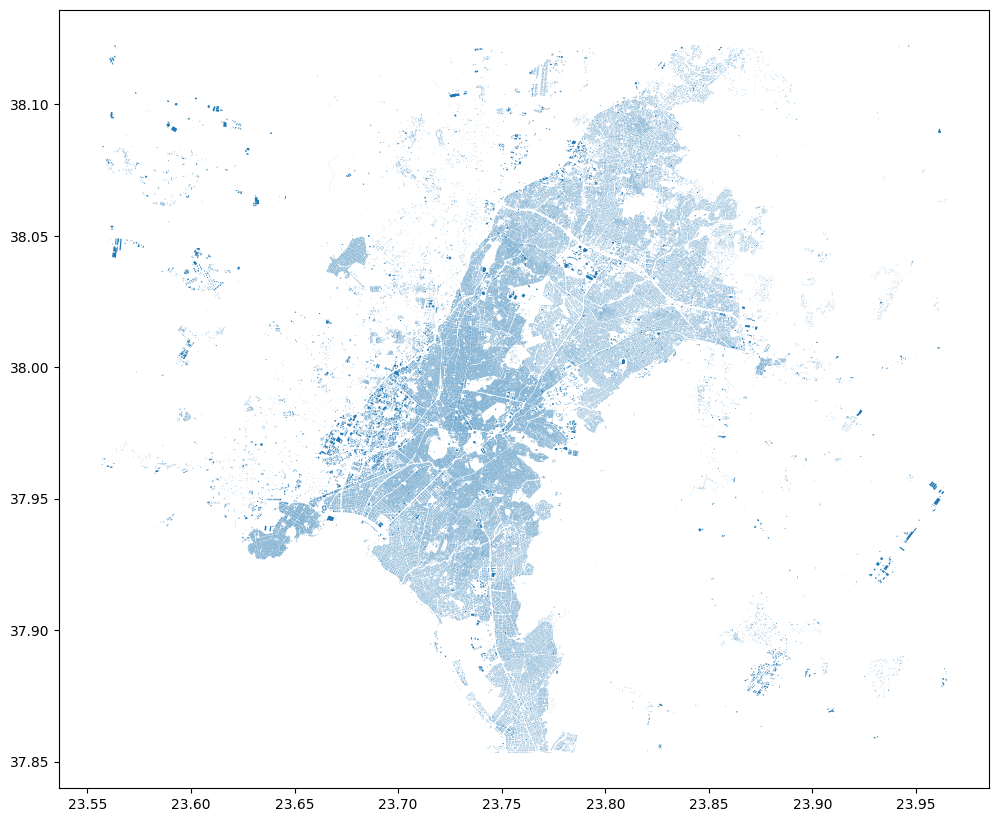

In [35]:
buildings.plot(figsize=(12,12))
plt.show()